# 1- Import Libraries

In [1]:
# 라이브러리 호출
import re 
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import random
from datetime import datetime

plt.rc('font', family='AppleGothic')
%config InlineBackend.figure_format = 'retina'

# 2- Loading Dataset

In [2]:
user_colums = ['user_id', 'gender', 'age', 'occupation', 'zip']
rating_columns = ['user_id', 'movie_id', 'rating', 'timestamp']
movie_columns = ['movie_id', 'title', 'genres']

In [4]:
data_path = '/Users/kenny_jung/aiffel/data/autoint/ml-1m'

In [6]:
users = pd.read_csv(f'{data_path}/users.dat', sep='::', header=None, names=user_colums, engine='python')
ratings = pd.read_csv(f'{data_path}/ratings.dat', sep='::', header=None, names=rating_columns, engine='python')
movies = pd.read_csv(f'{data_path}/movies.dat', sep='::', header=None, names=movie_columns, engine='python', encoding='latin-1')

# 3- Check Dataset

In [7]:
print(users.shape)
users.head()

(6040, 5)


,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [8]:
print(ratings.shape)
ratings.head()

(1000209, 4)


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [9]:
print(movies.shape)
movies.head()

(3883, 3)


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


# 4- EDA(Movies)

In [10]:
# 이 정규표현식은 '괄호 안에 있는 숫자4개만 뽑아주세요.'라는 의미입니다. 
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')

In [11]:
movies.head()

,movie_id,title,genres,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [12]:
movies['genres_split'] = movies['genres'].apply(lambda x: x.split('|'))
movies_exploded = movies.explode('genres_split')
movies_exploded.head(10)


,movie_id,title,genres,year,genres_split
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Animation
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Children's
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Adventure
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Children's
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,Comedy
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,Romance
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,Comedy
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,Drama


In [13]:
# plotly 버전(로컬 환경 또는 클라우드 노트북 환경에서 실행시켜 주세요!)
px.histogram(movies_exploded, x='genres_split', height=600, title='장르별 영화 수').update_xaxes(categoryorder="total descending")

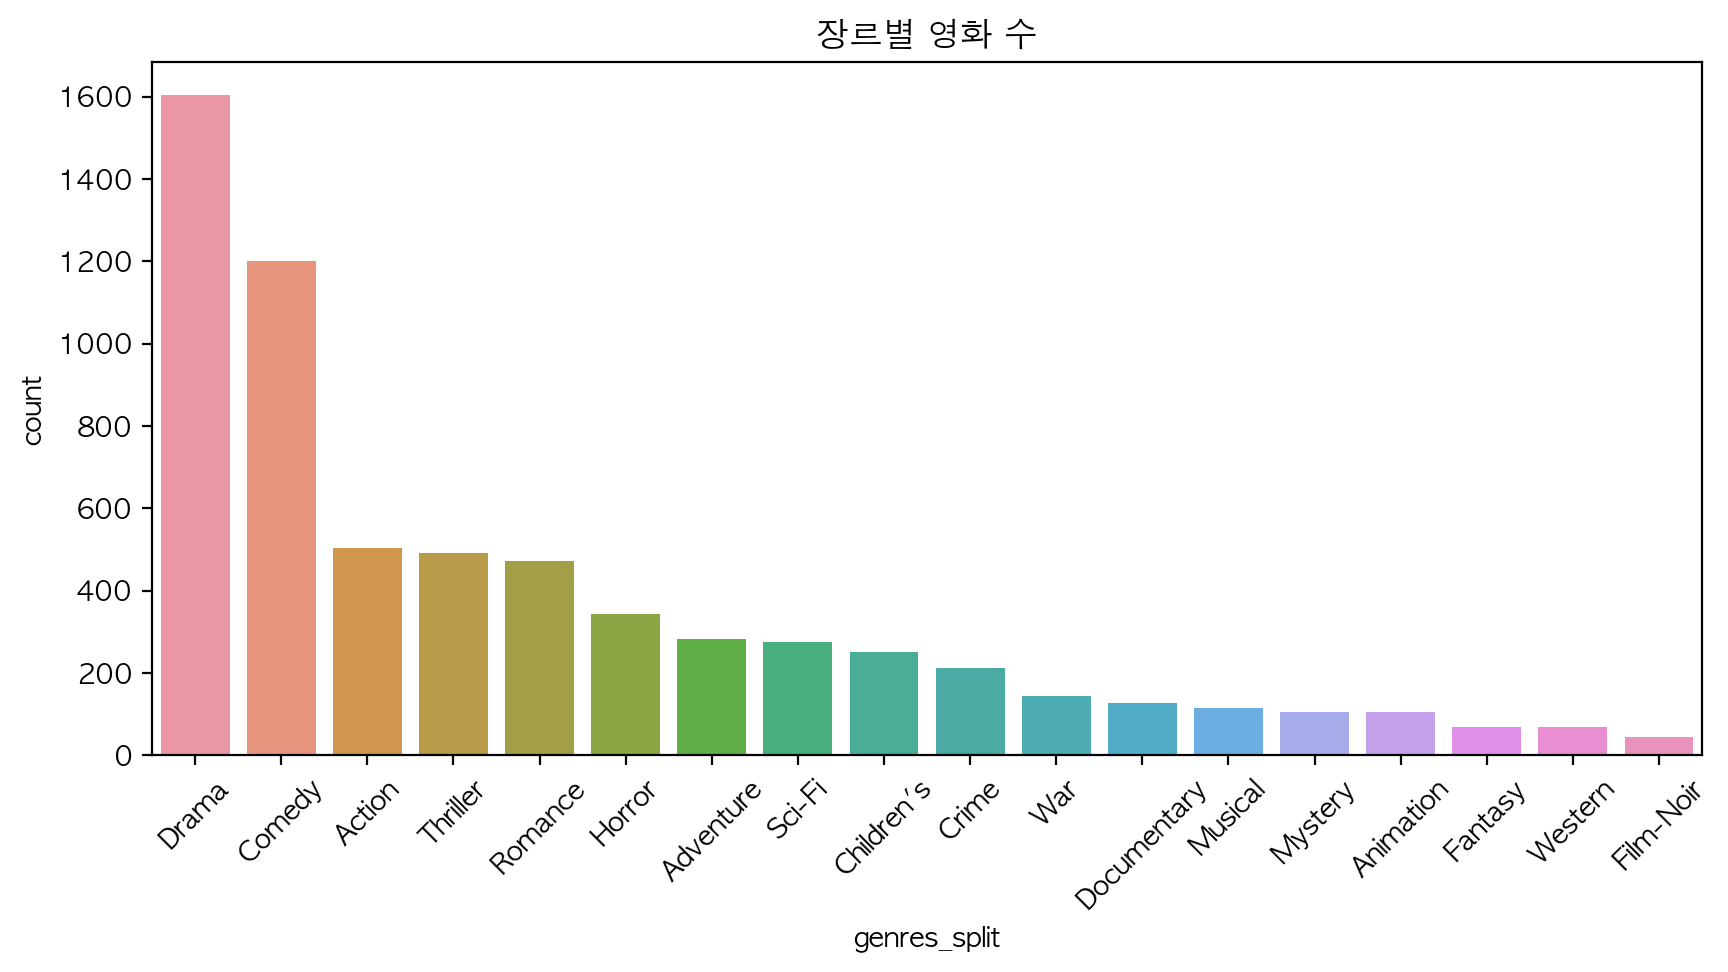

In [14]:
# seaborn 버전
sns.countplot(x='genres_split', data=movies_exploded, order = movies_exploded['genres_split'].value_counts().index)

plt.gcf().set_size_inches(10, 4.5)
plt.title('장르별 영화 수')
plt.xticks(rotation=45)
plt.show()

In [15]:
# plotly 버전 
movie_count_by_year = px.histogram(movies, x='year', height=600, title='연도별 영화 수').update_xaxes(categoryorder="total descending")
movie_count_by_year

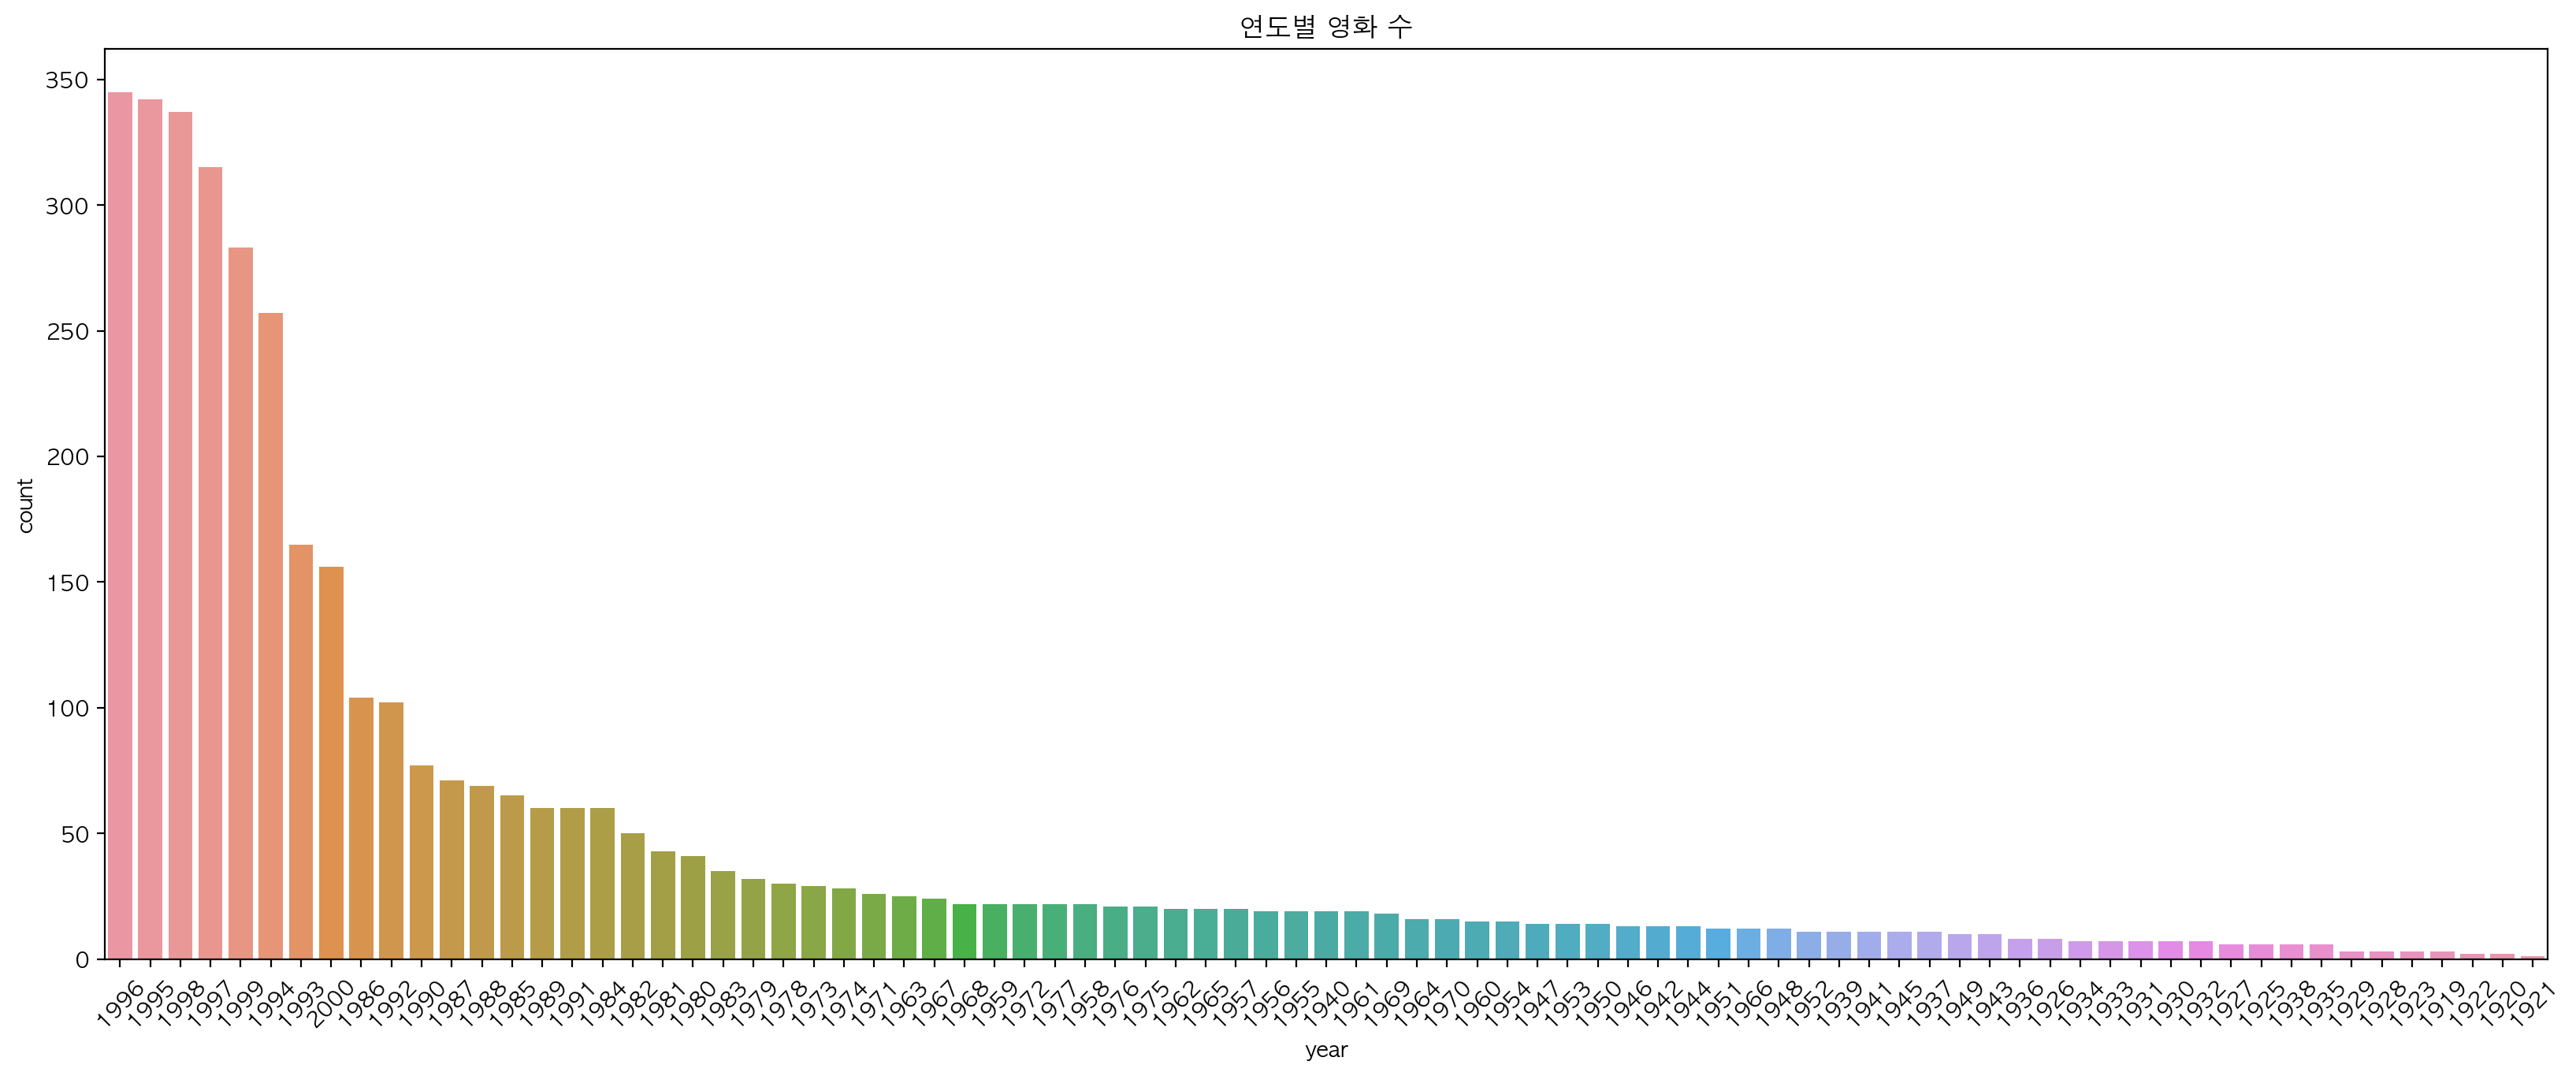

In [16]:
# seaborn 버전
year_counts = movies['year'].value_counts().reset_index()
year_counts.columns = ['year', 'count']

year_counts = year_counts.sort_values('count', ascending=False)

sns.barplot(x='year', y='count', data=year_counts)

plt.gcf().set_size_inches(20, 7.5)
plt.title('연도별 영화 수')
plt.xticks(rotation=45)
plt.show()

# 5- EDA(ratings)

In [17]:
mv_rating_agg = pd.DataFrame(ratings.groupby('movie_id')['rating'].mean())
mv_rating_agg['num_of_ratings'] = pd.DataFrame(ratings.groupby('movie_id')['rating'].count())
mv_rating_agg = mv_rating_agg.reset_index()
mv_rating_agg.columns = ['movie_id', 'avg_rating', 'num_of_ratings']
mv_rating_agg

,movie_id,avg_rating,num_of_ratings
0,1,4.146846,2077
1,2,3.201141,701
2,3,3.016736,478
3,4,2.729412,170
4,5,3.006757,296
...,...,...,...
3701,3948,3.635731,862
3702,3949,4.115132,304
3703,3950,3.666667,54
3704,3951,3.900000,40


In [18]:
# plotly 버전
px.histogram(mv_rating_agg, x='avg_rating', height=600, title='평점 분포')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



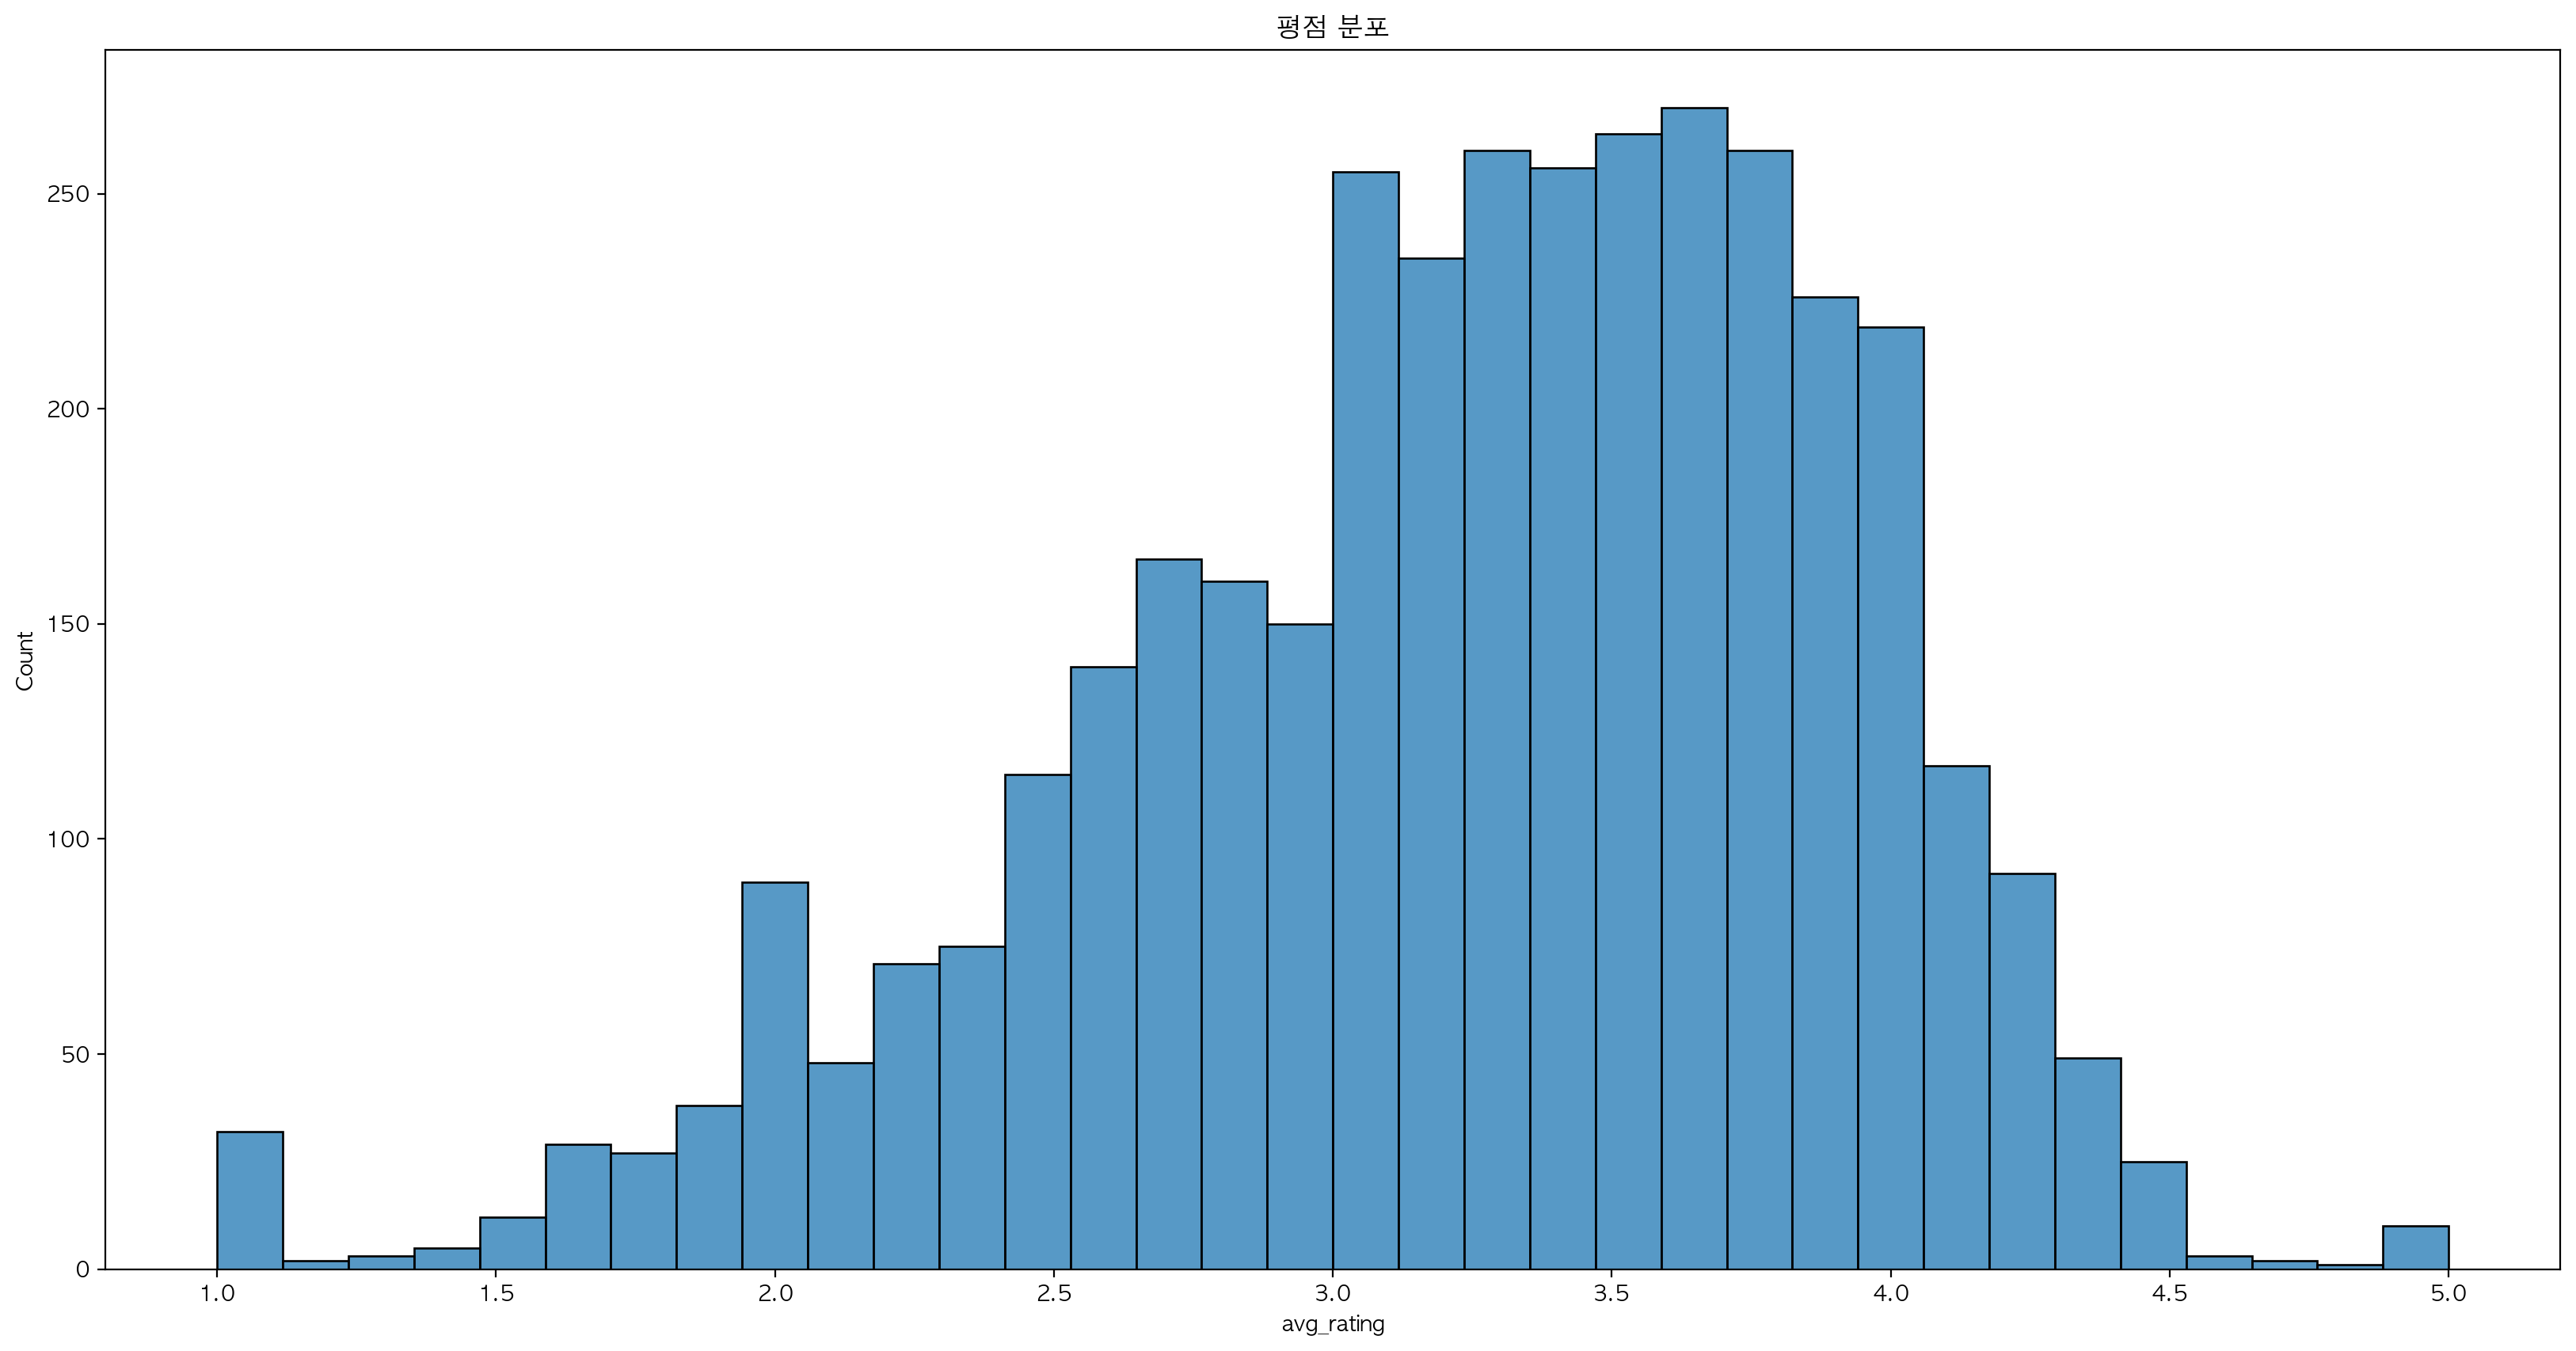

In [19]:
# seaborn 버전 
sns.histplot(mv_rating_agg['avg_rating'], kde=False)
plt.gcf().set_size_inches(20, 10)
plt.title('평점 분포')
plt.show()

# 6- EDA(genres)

In [20]:
movies_exploded.head()

,movie_id,title,genres,year,genres_split
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Animation
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Children's
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Adventure
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Children's


In [21]:
rating_by_genre_df = pd.merge(ratings[['movie_id', 'rating']] ,movies_exploded[['movie_id', 'genres_split']] ,on='movie_id').groupby('genres_split').agg({'rating': ['mean', 'count']}).sort_values(('rating', 'mean')).reset_index()
rating_by_genre_df

genres_split    rating        
                     mean   count
0        Horror  3.215013   76386
1    Children's  3.422035   72186
2       Fantasy  3.447371   36301
3        Sci-Fi  3.466521  157294
4     Adventure  3.477257  133953
5        Action  3.491185  257457
6        Comedy  3.522099  356580
7      Thriller  3.570466  189680
8       Romance  3.607465  147523
9       Western  3.637770   20683
10      Musical  3.665519   41533
11      Mystery  3.668102   40178
12    Animation  3.684868   43293
13        Crime  3.708679   79541
14        Drama  3.766332  354529
15          War  3.893327   68527
16  Documentary  3.933123    7910
17    Film-Noir  4.075188   18261

In [22]:
rating_by_genre_df.columns

MultiIndex([('genres_split',      ''),
            (      'rating',  'mean'),
            (      'rating', 'count')],
           )

In [23]:
for col in rating_by_genre_df.columns.values:
    if col[0] == 'rating':
        print('_'.join(col).strip())
    else:
        print(col[0])

genres_split
rating_mean
rating_count


In [24]:
rating_by_genre_df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in rating_by_genre_df.columns.values]    
rating_by_genre_df

,genres_split,rating_mean,rating_count
0,Horror,3.215013,76386
1,Children's,3.422035,72186
2,Fantasy,3.447371,36301
3,Sci-Fi,3.466521,157294
4,Adventure,3.477257,133953
5,Action,3.491185,257457
6,Comedy,3.522099,356580
7,Thriller,3.570466,189680
8,Romance,3.607465,147523
9,Western,3.637770,20683


In [25]:
# plotly 버전
px.bar(rating_by_genre_df, x='genres_split', y='rating_mean', height=500, title='장르별 평점').update_xaxes(categoryorder="total descending")

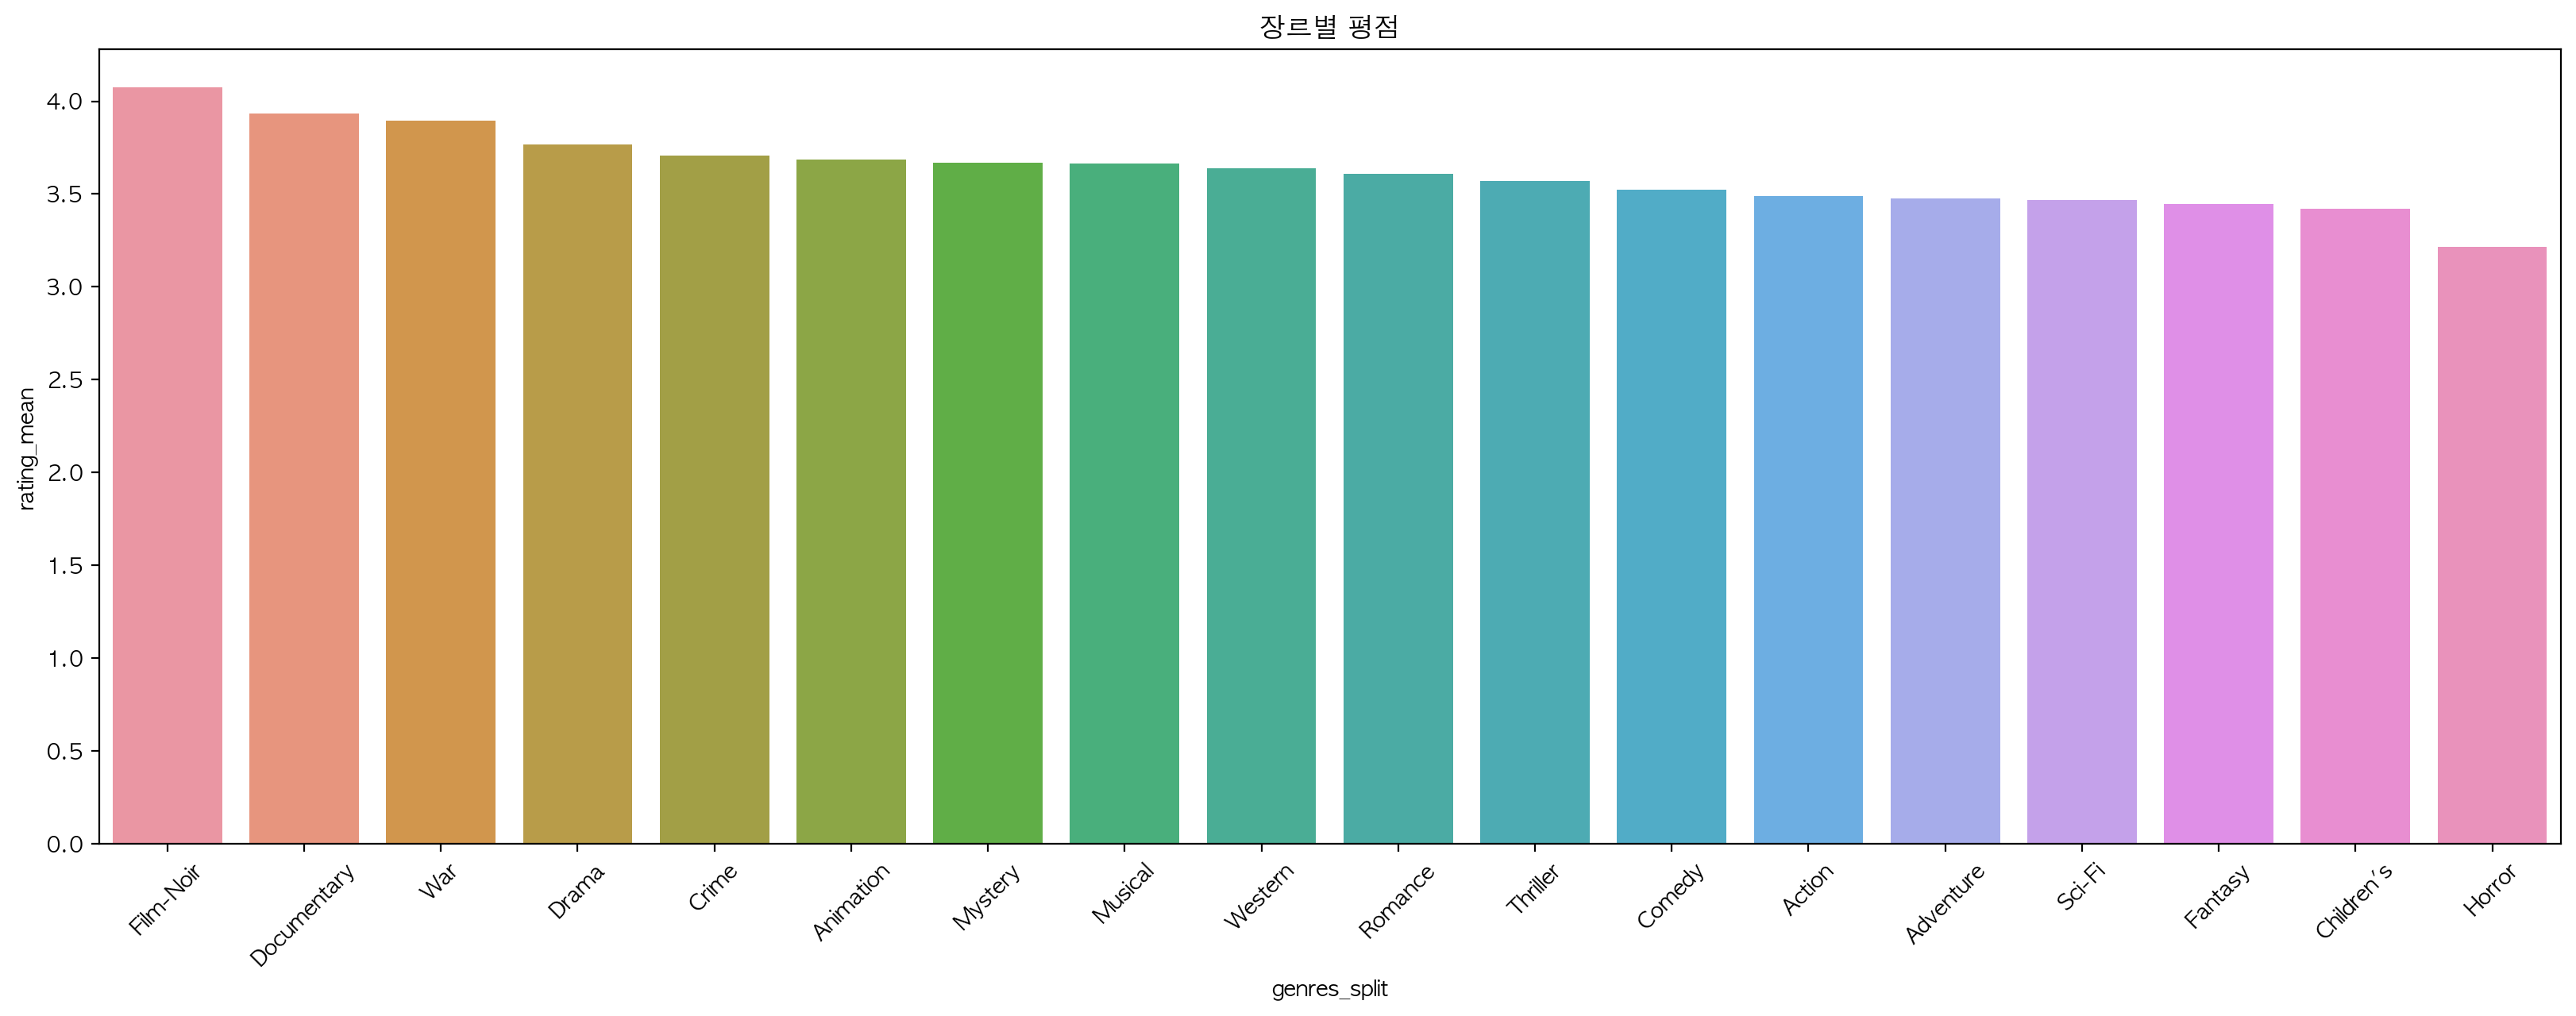

In [26]:
# seaborn 버전
rating_by_genre_df_sorted_by_mean = rating_by_genre_df.sort_values('rating_mean', ascending=False)

plt.figure(figsize=(20, 6.5))
sns.barplot(x='genres_split', y='rating_mean', data=rating_by_genre_df_sorted_by_mean)
plt.title('장르별 평점')
plt.xticks(rotation=45)
plt.show()

In [27]:
# plotly 버전
px.bar(rating_by_genre_df, x='genres_split', y='rating_count', height=500, title='장르별 평가 개수').update_xaxes(categoryorder="total descending")

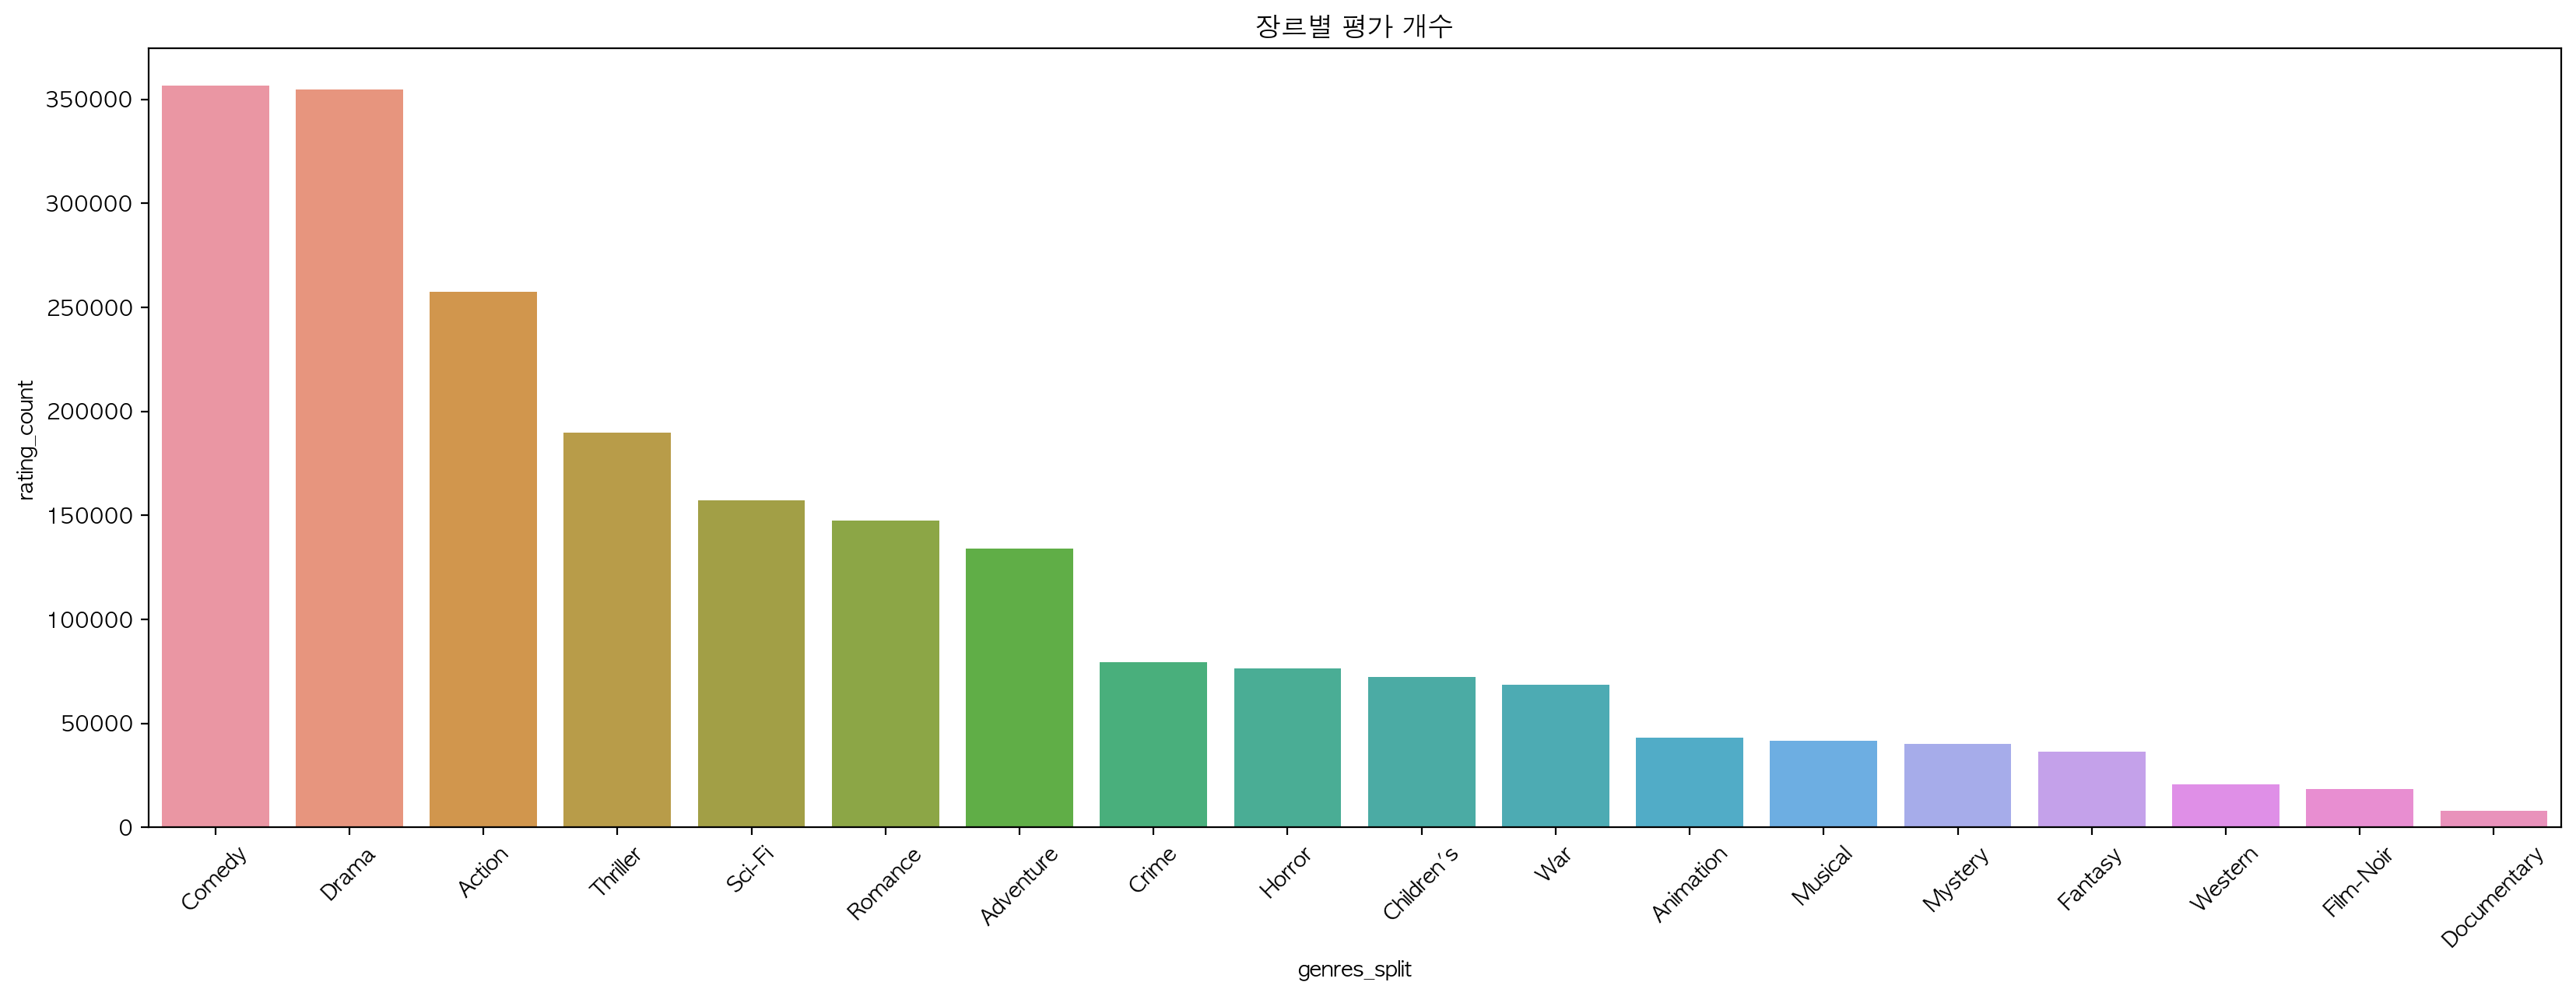

In [28]:
# seaborn 버전
rating_by_genre_df_sorted_by_count = rating_by_genre_df.sort_values('rating_count', ascending=False)

plt.figure(figsize=(20, 6.5))
sns.barplot(x='genres_split', y='rating_count', data=rating_by_genre_df_sorted_by_count)
plt.title('장르별 평가 개수')
plt.xticks(rotation=45)
plt.show()

# 7- Preprosessing

In [29]:
# Occupation
occupation_map = {
    0:"other or not specified",
    1:"academic/educator",
    2:"artist",
    3:"clerical/admin",
    4:"college/grad student",
    5:"customer service",
    6:"doctor/health care",
    7:"executive/managerial",
    8:"farmer",
    9:"homemaker",
    10:"K-12 student",
    11:"lawyer",
    12:"programmer",
    13:"retired",
    14:"sales/marketing",
    15:"scientist",
    16:"self-employed",
    17:"technician/engineer",
    18:"tradesman/craftsman",
    19:"unemployed",
    20:"writer"
}

In [30]:
users['occupation_nm'] = users['occupation'].map(occupation_map)
users.head()

,user_id,gender,age,occupation,zip,occupation_nm
0,1,F,1,10,48067,K-12 student
1,2,M,56,16,70072,self-employed
2,3,M,25,15,55117,scientist
3,4,M,45,7,02460,executive/managerial
4,5,M,25,20,55455,writer


In [44]:
user_colums = ['user_id', 'gender', 'age', 'occupation', 'zip']
rating_columns = ['user_id', 'movie_id', 'rating', 'timestamp']
movie_columns = ['movie_id', 'title', 'genres']
data_path = '/Users/kenny_jung/aiffel/data/autoint/ml-1m'
users = pd.read_csv(f'{data_path}/users.dat', sep='::', header=None, names=user_colums, engine='python')
ratings = pd.read_csv(f'{data_path}/ratings.dat', sep='::', header=None, names=rating_columns, engine='python')
movies = pd.read_csv(f'{data_path}/movies.dat', sep='::', header=None, names=movie_columns, engine='python', encoding='latin-1')

In [45]:
print(users.shape)
users.head()

(6040, 5)


,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [46]:
# 영화 데이터 확인
print(movies.shape)
movies.head()

(3883, 3)


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [47]:
# 평점 데이터 확인
print(ratings.shape)
ratings.head()

(1000209, 4)


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


### 7-1 Preprocessing(movie_year, movie_decade)

In [48]:
# 제목 뒤에 붙어 있는 연도를 정규표현식을 활용해 추출합니다. 
movies['movie_year'] = movies['title'].str.extract(r'\((\d{4})\)')
movies.head()
movies.isnull().sum()

movie_id      0
title         0
genres        0
movie_year    0
dtype: int64

In [49]:
a = 1995 % 10
b = 1995 - a

print(a)
print(b)

5
1990


In [50]:
# 90년대 영화, 2000년대 영화 등과 같은 년대 정보를 추출합니다. 
movies['movie_decade'] = movies['title'].str.extract(r'\((\d{4})\)')[0].astype(int).apply(lambda x: str(x - (x % 10)) + 's')
# title 컬럼에서 연도 정보를 빼고 제목만 따로 추출합니다.
movies['title'] = movies['title'].apply(lambda x: re.sub(r'\s*\(\d{4}\)', '', x))

In [51]:
movies.head()

,movie_id,title,genres,movie_year,movie_decade
0,1,Toy Story,Animation|Children's|Comedy,1995,1990s
1,2,Jumanji,Adventure|Children's|Fantasy,1995,1990s
2,3,Grumpier Old Men,Comedy|Romance,1995,1990s
3,4,Waiting to Exhale,Comedy|Drama,1995,1990s
4,5,Father of the Bride Part II,Comedy,1995,1990s


### 7-2 Preprocessing(genres)

In [52]:
# | 기호를 기준으로 장르 데이터를 분리합니다. 
genres_split = movies['genres'].str.split('|')
genres_split[:5]

0     [Animation, Children's, Comedy]
1    [Adventure, Children's, Fantasy]
2                   [Comedy, Romance]
3                     [Comedy, Drama]
4                            [Comedy]
Name: genres, dtype: object

In [53]:
max_genres = genres_split.apply(len).max() 

# 각 장르별로 새로운 컬럼을 생성합니다.
for i in range(max_genres):
    movies[f'genre{i + 1}'] = genres_split.apply(lambda x: x[i] if i < len(x) else None)

# 원래 있던 장르 컬럼은 날려줍니다.
movies.drop('genres', axis=1, inplace=True)

# None은 공백으로 채웁니다.
movies.fillna('', inplace=True)

In [54]:
print(movies.shape)
movies.head()

(3883, 10)


,movie_id,title,movie_year,movie_decade,genre1,genre2,genre3,genre4,genre5,genre6
0,1,Toy Story,1995,1990s,Animation,Children's,Comedy,,,
1,2,Jumanji,1995,1990s,Adventure,Children's,Fantasy,,,
2,3,Grumpier Old Men,1995,1990s,Comedy,Romance,,,,
3,4,Waiting to Exhale,1995,1990s,Comedy,Drama,,,,
4,5,Father of the Bride Part II,1995,1990s,Comedy,,,,,


In [55]:
set(movies['genre1'].unique().tolist() + movies['genre2'].unique().tolist() + movies['genre3'].unique().tolist())

{'',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

### 7-3 Preprocessing(ratings)

In [56]:
timestamp = 978300760 
dt_object = datetime.fromtimestamp(timestamp)

print(dt_object.strftime("%Y-%m-%d"))

2001-01-01


In [57]:
ratings['timestamp'] = ratings['timestamp'].apply(lambda x : datetime.fromtimestamp(x).strftime("%Y-%m-%d"))
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,2001-01-01
1,1,661,3,2001-01-01
2,1,914,3,2001-01-01
3,1,3408,4,2001-01-01
4,1,2355,5,2001-01-07


In [58]:
ratings['rating_year'] = ratings['timestamp'].apply(lambda x : x.split("-")[0]) 
ratings['rating_month'] = ratings['timestamp'].apply(lambda x : x.split("-")[1])
ratings['rating_decade'] = ratings['rating_year'].astype(int).apply(lambda x: str(x - (x % 10)) + 's')

In [61]:
ratings.head()

,user_id,movie_id,rating,timestamp,rating_year,rating_month,rating_decade
0,1,1193,5,2001-01-01,2001,01,2000s
1,1,661,3,2001-01-01,2001,01,2000s
2,1,914,3,2001-01-01,2001,01,2000s
3,1,3408,4,2001-01-01,2001,01,2000s
4,1,2355,5,2001-01-07,2001,01,2000s


### 7-4 Archive Preprosessed Dataset

In [62]:
# 임시 저장 
movies.to_csv(f"{data_path}/movies_prepro.csv", index=False)
ratings.to_csv(f"{data_path}/ratings_prepro.csv", index=False)
users.to_csv(f"{data_path}/users_prepro.csv", index=False)

In [64]:
!ls /Users/kenny_jung/aiffel/data/autoint/ml-1m

movies.dat         ratings.dat        users.dat
movies_prepro.csv  ratings_prepro.csv users_prepro.csv


# 8- Dataset for Modeling

### 8-1 Rating (Random Sampling Basis) 

In [65]:
# 1. 3점 이상의 점수를 부여한 영화를 '선호'영화라고 가정하고, 이를 label=1로 생성합니다.
ratings = ratings[ratings['rating'] >= 3]
ratings['label'] = 1
ratings.drop('rating', axis=1, inplace=True)
print(ratings.shape)
ratings.head()

(836478, 7)


,user_id,movie_id,timestamp,rating_year,rating_month,rating_decade,label
0,1,1193,2001-01-01,2001,01,2000s,1
1,1,661,2001-01-01,2001,01,2000s,1
2,1,914,2001-01-01,2001,01,2000s,1
3,1,3408,2001-01-01,2001,01,2000s,1
4,1,2355,2001-01-07,2001,01,2000s,1


In [66]:
# 1. 사용자가 봤던(선호했던) 영화 리스트를 추출합니다. 사용자마다 평점이 3점 이상인 영화 리스트가 구성됩니다. 
user_seen_movies = ratings.groupby('user_id')['movie_id'].apply(list).reset_index()
user_seen_movies.head()

,user_id,movie_id
0,1,"[1193, 661, 914, 3408, 2355, 1197, 1287, 2804,..."
1,2,"[1357, 3068, 1537, 647, 2194, 648, 2268, 2628,..."
2,3,"[3421, 648, 1394, 3534, 104, 2735, 1210, 1431,..."
3,4,"[3468, 1210, 2951, 1214, 1036, 260, 2028, 480,..."
4,5,"[2987, 2333, 1175, 39, 2337, 1535, 1392, 1466,..."


In [67]:
# 2. 먼저 고유 영화와 고유 사용자들을 가지고 옵니다. 
unique_movies = movies['movie_id'].unique()
unique_users = users['user_id'].unique()
negative_users = []
negative_movies = []
negative_labels = []

# 사용자별로 하나씩 진행합니다.
for user in unique_users:
    # 충분한 이력이 없는 사용자는 넘어갑니다. 충분한 이력이 없는 사용자 데이터는 훈련에 방해가 되고 overfitting 등이 될 수 있습니다.
    if len(user_seen_movies[user_seen_movies['user_id'] == user]) < 1:
        continue
    # 2-1. 해당 사용자가 선호하는 영화 리스트를 가지고 옵니다.
    user_seen_movie_list = user_seen_movies[user_seen_movies['user_id'] == user]['movie_id'].values[0]
    # 2-2. 전체 영화 중 사용자가 선호한 영화 정보를 제외합니다.
    user_non_seen_movie_list = list(set(unique_movies) - set(user_seen_movie_list))
    # 2-3. 선호 영화 1개당 비선호 영화 5개를 추출합니다. 
    sample_pop_size = len(user_seen_movie_list)*5
    # 만약 비선호 영화 샘플 개수가 전체 영화 개수보다 크면, 비선호 영화 샘플 개수는 전체 영화 개수에서 사용자가 선호한 영화의 개수를 뺀 값(해당 사용자 입장에선 샘플링 최대 값)으로 설정합니다.
    if len(unique_movies) - len(user_seen_movie_list) < len(user_seen_movie_list)*5 :
        sample_pop_size = len(unique_movies) - len(user_seen_movie_list)
    # 랜덤으로 추출합니다. 
    user_negative_movie_list = random.sample(user_non_seen_movie_list, sample_pop_size)
    
    # 해당 값들을 리스트에 저장합니다.
    negative_users += [user for _ in range(len(user_negative_movie_list))]
    negative_movies += user_negative_movie_list
    negative_labels += [0 for _ in range(len(user_negative_movie_list))]

In [68]:
print(len(negative_users))
print(len(negative_movies))
print(len(negative_labels))

4068124
4068124
4068124


In [69]:
negative_ratings_df = pd.DataFrame({'user_id' : negative_users, 'movie_id' : negative_movies, 'label':negative_labels})
print(negative_ratings_df.shape)
negative_ratings_df.head()

(4068124, 3)


,user_id,movie_id,label
0,1,2672,0
1,1,1019,0
2,1,581,0
3,1,3370,0
4,1,1658,0


In [70]:
ratings_df = ratings[['user_id', 'movie_id', 'label']] 
ratings_df = pd.concat([ratings_df, negative_ratings_df], axis=0)
movies_df = movies[['movie_id', 'movie_decade', 'movie_year', 'genre1']]
movies_df.columns = ['movie_id', 'decade', 'movie_year', 'genre']
user_df = users[['user_id', 'gender', 'age', 'occupation', 'zip']]

In [71]:
merge_mlens_data = pd.merge(ratings_df, movies_df, on='movie_id')
merge_mlens_data = pd.merge(merge_mlens_data, user_df, on='user_id')
merge_mlens_data.dropna(inplace=True)
print(merge_mlens_data.shape)
merge_mlens_data.head()

(4904602, 10)


,user_id,movie_id,label,decade,movie_year,genre,gender,age,occupation,zip
0,1,1193,1,1970s,1975,Drama,F,1,10,48067
1,1,661,1,1990s,1996,Animation,F,1,10,48067
2,1,914,1,1960s,1964,Musical,F,1,10,48067
3,1,3408,1,2000s,2000,Drama,F,1,10,48067
4,1,2355,1,1990s,1998,Animation,F,1,10,48067


In [72]:
merge_mlens_data = merge_mlens_data[['user_id', 'movie_id','decade', 'movie_year', 'genre', 'gender', 'age', 'occupation', 'zip', 'label']]
print(merge_mlens_data.shape)
merge_mlens_data.head()

(4904602, 10)


,user_id,movie_id,decade,movie_year,genre,gender,age,occupation,zip,label
0,1,1193,1970s,1975,Drama,F,1,10,48067,1
1,1,661,1990s,1996,Animation,F,1,10,48067,1
2,1,914,1960s,1964,Musical,F,1,10,48067,1
3,1,3408,2000s,2000,Drama,F,1,10,48067,1
4,1,2355,1990s,1998,Animation,F,1,10,48067,1


In [73]:
merge_mlens_data.to_csv(f'{data_path}/movielens_rcmm_v1.csv', index=False)

In [75]:
!ls -l /Users/kenny_jung/aiffel/data/autoint/ml-1m

total 548968
-rw-r--r--  1 kenny_jung  staff  211805214 Apr  4 17:04 movielens_rcmm_v1.csv
-rw-r-----@ 1 kenny_jung  staff     171308 Mar 27  2003 movies.dat
-rw-r--r--  1 kenny_jung  staff     198094 Apr  4 17:01 movies_prepro.csv
-rw-r-----@ 1 kenny_jung  staff   24594131 Mar  1  2003 ratings.dat
-rw-r--r--  1 kenny_jung  staff   36558754 Apr  4 17:01 ratings_prepro.csv
-rw-r-----@ 1 kenny_jung  staff     134368 Mar  1  2003 users.dat
-rw-r--r--  1 kenny_jung  staff     110242 Apr  4 17:01 users_prepro.csv


### 8-2 Rating (Preference Basis) 

In [76]:
users_df = pd.read_csv(f'{data_path}/users_prepro.csv')
ratings_df = pd.read_csv(f'{data_path}/ratings_prepro.csv')
movies_df = pd.read_csv(f'{data_path}/movies_prepro.csv')

In [77]:
print(users_df.columns)
print(ratings_df.columns)
print(movies_df.columns)

Index(['user_id', 'gender', 'age', 'occupation', 'zip'], dtype='object')
Index(['user_id', 'movie_id', 'rating', 'timestamp', 'rating_year',
       'rating_month', 'rating_decade'],
      dtype='object')
Index(['movie_id', 'title', 'movie_year', 'movie_decade', 'genre1', 'genre2',
       'genre3', 'genre4', 'genre5', 'genre6'],
      dtype='object')


In [78]:
# 1. 4점 이상인 데이터를 1로, 아닌 데이터를 0으로 설정합니다.  
ratings_df['label'] = ratings_df['rating'].apply(lambda x : x >=4).astype(int)

ratings_df = ratings_df[['user_id', 'movie_id', 'rating_year','rating_month', 'rating_decade', 'label']]
ratings_df.head()

,user_id,movie_id,rating_year,rating_month,rating_decade,label
0,1,1193,2001,1,2000s,1
1,1,661,2001,1,2000s,0
2,1,914,2001,1,2000s,0
3,1,3408,2001,1,2000s,1
4,1,2355,2001,1,2000s,1


In [79]:
# 2. 필요 데이터만 가지고 옵니다. 특히 장르는 3개만 가지고 와서 활용합니다.  
movies_df = movies_df[['movie_id', 'movie_decade', 'movie_year', 'genre1', 'genre2', 'genre3']]
users_df = users_df[['user_id', 'gender', 'age', 'occupation', 'zip']]

In [80]:
# 필요한 데이터를 합쳐줍니다.   
merge_mlens_data = pd.merge(ratings_df, movies_df, on='movie_id')
merge_mlens_data = pd.merge(merge_mlens_data, users_df, on='user_id')
merge_mlens_data.fillna('no', inplace=True)
print(merge_mlens_data.shape)
merge_mlens_data.head()

(1000209, 15)


,user_id,movie_id,rating_year,rating_month,rating_decade,label,movie_decade,movie_year,genre1,genre2,genre3,gender,age,occupation,zip
0,1,1193,2001,1,2000s,1,1970s,1975,Drama,no,no,F,1,10,48067
1,1,661,2001,1,2000s,0,1990s,1996,Animation,Children's,Musical,F,1,10,48067
2,1,914,2001,1,2000s,0,1960s,1964,Musical,Romance,no,F,1,10,48067
3,1,3408,2001,1,2000s,1,2000s,2000,Drama,no,no,F,1,10,48067
4,1,2355,2001,1,2000s,1,1990s,1998,Animation,Children's,Comedy,F,1,10,48067


In [81]:
merge_mlens_data = merge_mlens_data[['user_id', 'movie_id','movie_decade', 'movie_year', 'rating_year', 'rating_month', 'rating_decade', 'genre1','genre2', 'genre3', 'gender', 'age', 'occupation', 'zip', 'label']]
print(merge_mlens_data.shape)
merge_mlens_data.head()

(1000209, 15)


,user_id,movie_id,movie_decade,movie_year,rating_year,rating_month,rating_decade,genre1,genre2,genre3,gender,age,occupation,zip,label
0,1,1193,1970s,1975,2001,1,2000s,Drama,no,no,F,1,10,48067,1
1,1,661,1990s,1996,2001,1,2000s,Animation,Children's,Musical,F,1,10,48067,0
2,1,914,1960s,1964,2001,1,2000s,Musical,Romance,no,F,1,10,48067,0
3,1,3408,2000s,2000,2001,1,2000s,Drama,no,no,F,1,10,48067,1
4,1,2355,1990s,1998,2001,1,2000s,Animation,Children's,Comedy,F,1,10,48067,1


In [82]:
# 저장합니다.
merge_mlens_data.to_csv(f'{data_path}/movielens_rcmm_v2.csv', index=False)

In [83]:
!ls -l /Users/kenny_jung/aiffel/data/autoint/ml-1m

total 681912
-rw-r--r--  1 kenny_jung  staff  211805214 Apr  4 17:04 movielens_rcmm_v1.csv
-rw-r--r--  1 kenny_jung  staff   67336007 Apr  4 17:06 movielens_rcmm_v2.csv
-rw-r-----@ 1 kenny_jung  staff     171308 Mar 27  2003 movies.dat
-rw-r--r--  1 kenny_jung  staff     198094 Apr  4 17:01 movies_prepro.csv
-rw-r-----@ 1 kenny_jung  staff   24594131 Mar  1  2003 ratings.dat
-rw-r--r--  1 kenny_jung  staff   36558754 Apr  4 17:01 ratings_prepro.csv
-rw-r-----@ 1 kenny_jung  staff     134368 Mar  1  2003 users.dat
-rw-r--r--  1 kenny_jung  staff     110242 Apr  4 17:01 users_prepro.csv


# 9- AutoInt Modeling

- 멀티헤드 셀프 어텐션(multi-head self-attention)구조를 활용해 입력 피처들간의 상호작용과 관계성을 모델링

- 쌓아올린 구조(stack)를 통해 서로 다른 차원에서 피처 상호작용 학습

- 고차 상호작용을 명시적(explicitly) & 자동(automatic)으로 학습

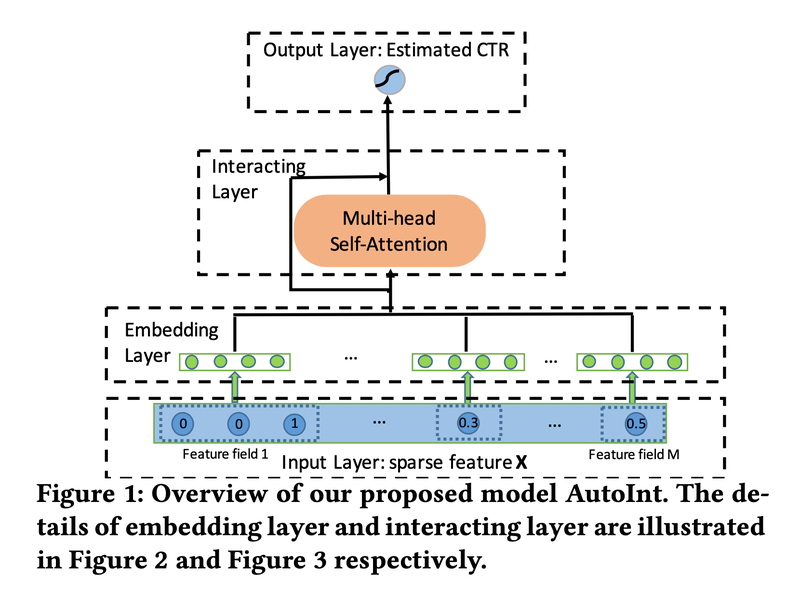

### 9-1 Import Libraries

In [84]:
import time
import random
import pandas as pd
import numpy as np

from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, MaxPooling2D, Conv2D, Dropout, Lambda, Dense, Flatten, Activation, Input, Embedding, BatchNormalization
from tensorflow.keras.initializers import glorot_normal, Zeros, TruncatedNormal
from tensorflow.keras.regularizers import l2


from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy


from tensorflow.keras.optimizers import Adam
from collections import defaultdict
import math

### 9-2 Designing Layers

1. 임베딩 레이어

- 임베딩 레이어는 raw input 데이터를 저차원 임베딩 공간에 매핑하는 과정을 의미합니다.

- 예를 들어 성별이 남, 여가 있다면 이는 각각 0과 1로 매핑될 수 있고, 0에 해당되는 32차원 임베딩 공간, 1에 해당되는 임베딩 공간에 매핑하는 과정이죠.

2. 다층 퍼셉트론(MLP-Multilayer Perceptron, DNN 구조)

- 딥러닝을 배우면 거의 가장 먼저 배울 수 있는 구조입니다.

- 비선형 레이어를 쌓아올린 구조입니다. Dense layer를 쌓아올린 구조라고 보시면 됩니다.

3. 멀티 헤드 어텐션

- 쿼리(query), 키(key), 값(value)에 따른 어텐션을 계산하는 구조입니다.

- 본 모델에서는 셀프 어텐션 구조로 진행됩니다

### 9-3 Embeding Layer

In [87]:
class FeaturesEmbedding(Layer):  
    '''
    임베딩 레이어입니다. 
    - 만약 피처(feature) 3개가 각각 10개, 20개, 30개의 고유값을 가진다면 feature_dims는 [10, 20, 30] 형태를 띄게 됩니다.
    - 전체 임베딩을 해야 할 개수는 10+20+30 = 60이므로 '60 x 임베딩_차원_크기'의 행렬이 생성되게 됩니다.
    '''
    def __init__(self, field_dims, embed_dim, **kwargs):
        super(FeaturesEmbedding, self).__init__(**kwargs)
        self.total_dim = sum(field_dims)
        self.embed_dim = embed_dim
        self.offsets = np.array((0, *np.cumsum(field_dims)[:-1]), dtype=np.longlong)
        self.embedding = tf.keras.layers.Embedding(input_dim=self.total_dim, output_dim=self.embed_dim)

    def build(self, input_shape):
        # 임베딩을 빌드하고 초기화합니다.
        self.embedding.build(input_shape)
        self.embedding.set_weights([tf.keras.initializers.GlorotUniform()(shape=self.embedding.weights[0].shape)])

    def call(self, x):
        # 들어온 입력의 임베딩을 가져니다.
        x = x + tf.constant(self.offsets)
        return self.embedding(x)

### 9-4 Multi Layer Perceptron Layer

In [89]:
class MultiLayerPerceptron(Layer):  
    '''
    DNN 레이어입니다.
    - Tensorflow Keras에서는 Dense 레이어를 쌓아올린 구조입니다.
    - 필요에 따라 배치 정규화도 사용할 수 있습니다.
    '''
    def __init__(self, input_dim, hidden_units, activation='relu', l2_reg=0, dropout_rate=0, use_bn=False, init_std=0.0001, output_layer=True):
        super(MultiLayerPerceptron, self).__init__()
        self.dropout_rate = dropout_rate
        self.use_bn = use_bn
        hidden_units = [input_dim] + list(hidden_units)
        if output_layer:
            hidden_units += [1]
        # Dense layer를 쌓아올립니다.
        self.linears = [Dense(units, activation=None, kernel_initializer=tf.random_normal_initializer(stddev=init_std),
                              kernel_regularizer=tf.keras.regularizers.l2(l2_reg)) for units in hidden_units[1:]]
        # 활성화 함수를 세팅합니다.
        self.activation = tf.keras.layers.Activation(activation)
        # 필요하다면 배치정규화도 진행합니다.
        if self.use_bn:
            self.bn = [BatchNormalization() for _ in hidden_units[1:]]
        self.dropout = Dropout(dropout_rate)

    def call(self, inputs, training=False):
        x = inputs
        for i in range(len(self.linears)):
            # input data가 들어오면 layer를 돌면서 벡터 값을 가져오게 됩니다.
            x = self.linears[i](x)
            if self.use_bn:
                x = self.bn[i](x, training=training)
            # 각 layer마다 나온 벡터 값에 활성화 함수와 dropout을 적용시켜 비선형성 구조와 과적합을 방지합니다.
            x = self.activation(x)
            x = self.dropout(x, training=training)
        return x

### 9-5 Multi Head Attention Layer

In [90]:
class MultiHeadSelfAttention(Layer):  
    '''
    멀티 헤드 셀프 어텐션 레이어입니다.
    - 위에 작성한 수식과 같이 동작됩니다.
    - 필요에 따라 잔차 연결(residual connection)도 진행합니다.
    '''
    def __init__(self, att_embedding_size=8, head_num=2, use_res=True, scaling=False, seed=1024, **kwargs):
        if head_num <= 0:
            raise ValueError('head_num must be a int > 0')
        self.att_embedding_size = att_embedding_size
        self.head_num = head_num
        self.use_res = use_res
        self.seed = seed
        self.scaling = scaling
        super(MultiHeadSelfAttention, self).__init__(**kwargs)

    def build(self, input_shape):
        if len(input_shape) != 3:
            raise ValueError(
                "Unexpected inputs dimensions %d, expect to be 3 dimensions" % (len(input_shape)))
        embedding_size = int(input_shape[-1])
        # 쿼리에 해당하는 매트릭스입니다. 
        self.W_Query = self.add_weight(name='query', shape=[embedding_size, self.att_embedding_size * self.head_num],
                                       dtype=tf.float32,
                                       initializer=TruncatedNormal(seed=self.seed))
        # 키에 해당되는 매트릭스입니다.
        self.W_key = self.add_weight(name='key', shape=[embedding_size, self.att_embedding_size * self.head_num],
                                     dtype=tf.float32,
                                     initializer=TruncatedNormal(seed=self.seed + 1))
        # 값(value)에 해당되는 매트릭스입니다.
        self.W_Value = self.add_weight(name='value', shape=[embedding_size, self.att_embedding_size * self.head_num],
                                       dtype=tf.float32,
                                       initializer=TruncatedNormal(seed=self.seed + 2))
        # 필요하다면 잔차 연결도 할 수 있습니다.
        if self.use_res:
            self.W_Res = self.add_weight(name='res', shape=[embedding_size, self.att_embedding_size * self.head_num],
                                         dtype=tf.float32,
                                         initializer=TruncatedNormal(seed=self.seed))

        super(MultiHeadSelfAttention, self).build(input_shape)

    def call(self, inputs, **kwargs):
        if K.ndim(inputs) != 3:
            raise ValueError("Unexpected inputs dimensions %d, expect to be 3 dimensions" % (K.ndim(inputs)))
        
        # 입력이 들어오면 쿼리, 키, 값(value)에 매칭되어 각각의 값을 가지고 옵니다.
        querys = tf.tensordot(inputs, self.W_Query, axes=(-1, 0))  
        keys = tf.tensordot(inputs, self.W_key, axes=(-1, 0))
        values = tf.tensordot(inputs, self.W_Value, axes=(-1, 0))

        # 헤드 개수에 따라 데이터를 분리해줍니다.
        querys = tf.stack(tf.split(querys, self.head_num, axis=2))
        keys = tf.stack(tf.split(keys, self.head_num, axis=2))
        values = tf.stack(tf.split(values, self.head_num, axis=2))
        
        # 쿼리와 키를 먼저 곱해줍니다. 위 이미지의 식 (5)와 같습니다.
        inner_product = tf.matmul(querys, keys, transpose_b=True)
        if self.scaling:
            inner_product /= self.att_embedding_size ** 0.5
        self.normalized_att_scores =  tf.nn.softmax(inner_product)
        
        # 쿼리와 키에서 나온 어텐션 값을 값(value)에 곱해줍니다. 식 (6)과 같습니다.
        result = tf.matmul(self.normalized_att_scores, values)
        # 식 (7)과 같이 쪼개어진 멀테 헤드를 모아줍니다.
        result = tf.concat(tf.split(result, self.head_num, ), axis=-1)
        result = tf.squeeze(result, axis=0) 

        if self.use_res:
            result += tf.tensordot(inputs, self.W_Res, axes=(-1, 0))
        result = tf.nn.relu(result)
        
        # 그 결과 값을 리턴합니다.

        return result

    def compute_output_shape(self, input_shape):

        return (None, input_shape[1], self.att_embedding_size * self.head_num)

    def get_config(self, ):
        config = {'att_embedding_size': self.att_embedding_size, 'head_num': self.head_num, 'use_res': self.use_res,'seed': self.seed}
        base_config = super(MultiHeadSelfAttention, self).get_config()
        base_config.update(config)
        return base_config

### 9-6 AutoInt Model

In [91]:
class AutoInt(Layer): 
    '''
     AutoInt 본체입니다. 앞서서 정의한 layer를 가져와서 계산을 수행합니다.
    '''
    def __init__(self, field_dims, embedding_size, att_layer_num=3, att_head_num=2, att_res=True, 
                 l2_reg_dnn=0, l2_reg_embedding=1e-5, dnn_use_bn=False, dnn_dropout=0.4, init_std=0.0001):
        super(AutoInt, self).__init__()
        # 임베딩 레이어를 정의합니다. 
        self.embedding = FeaturesEmbedding(field_dims, embedding_size)
        self.num_fields = len(field_dims)
        self.embedding_size = embedding_size
        # 마지막 출력 레이어를 정의합니다.
        self.final_layer = Dense(1, use_bias=False, kernel_initializer=tf.random_normal_initializer(stddev=init_std))
        # 멀티 레이어 퍼셉트론 레이어를 정의합니다.
        self.int_layers = [MultiHeadSelfAttention(att_embedding_size=embedding_size, head_num=att_head_num, use_res=att_res) for _ in range(att_layer_num)]

    def call(self, inputs):
        # input 데이터에 해당되는 embedding 값을 가져옵니다.
        att_input = self.embedding(inputs)
        # 멀티 헤드 셀프 어텐션 레이어에서 상호작용을 수행합니다.
        for layer in self.int_layers:
            att_input = layer(att_input)

        att_output = Flatten()(att_input)
        # 최종 출력입니다. 
        att_output = self.final_layer(att_output)
        # sigmoid로 예측값을 출력합니다.
        y_pred = tf.nn.sigmoid(att_output)

        return y_pred

### 9-7 Evaluation

In [92]:
# 평가 함수는 아래의 링크에서 가져왔습니다.
# https://www.programcreek.com/python/?code=MaurizioFD%2FRecSys2019_DeepLearning_Evaluation%2FRecSys2019_DeepLearning_Evaluation-master%2FConferences%2FKDD%2FMCRec_our_interface%2FMCRecRecommenderWrapper.py
def get_DCG(ranklist, y_true):
    dcg = 0.0
    for i in range(len(ranklist)):
        item = ranklist[i]
        if item in y_true:
            dcg += 1.0 / math.log(i + 2)
    return  dcg

def get_IDCG(ranklist, y_true):
    idcg = 0.0
    i = 0
    for item in y_true:
        if item in ranklist:
            idcg += 1.0 / math.log(i + 2)
            i += 1
    return idcg

def get_NDCG(ranklist, y_true):
    '''NDCG 평가 지표'''
    ranklist = np.array(ranklist).astype(int)
    y_true = np.array(y_true).astype(int)
    dcg = get_DCG(ranklist, y_true)
    idcg = get_IDCG(y_true, y_true)
    if idcg == 0:
        return 0
    return round( (dcg / idcg), 5)

def get_hit_rate(ranklist, y_true):
    '''hitrate 평가 지표'''
    c = 0
    for y in y_true:
        if y in ranklist:
            c += 1
    return round( c / len(y_true), 5 )

### 9-8 Testing Model

In [93]:
def test_model(model, test_df):
    '''모델 테스트'''
    user_pred_info = defaultdict(list)
    total_rows = len(test_df)
    for i in range(0, total_rows, batch_size):
        features = test_df.iloc[i:i + batch_size, :-1].values
        y_pred = model.predict(features, verbose=False)
        for feature, p in zip(features, y_pred):
            u_i = feature[:2]
            user_pred_info[int(u_i[0])].append((int(u_i[1]), float(p)))
    return user_pred_info

# 10- Setting Dataset

In [94]:
# 1. 데이터 불러오기
# csv 데이터이므로 read_csv로 가져옵니다.
movielens_rcmm = pd.read_csv(f"{data_path}/movielens_rcmm_v2.csv", dtype=str)
print(movielens_rcmm.shape)
movielens_rcmm.head()

(1000209, 15)


,user_id,movie_id,movie_decade,movie_year,rating_year,rating_month,rating_decade,genre1,genre2,genre3,gender,age,occupation,zip,label
0,1,1193,1970s,1975,2001,1,2000s,Drama,no,no,F,1,10,48067,1
1,1,661,1990s,1996,2001,1,2000s,Animation,Children's,Musical,F,1,10,48067,0
2,1,914,1960s,1964,2001,1,2000s,Musical,Romance,no,F,1,10,48067,0
3,1,3408,2000s,2000,2001,1,2000s,Drama,no,no,F,1,10,48067,1
4,1,2355,1990s,1998,2001,1,2000s,Animation,Children's,Comedy,F,1,10,48067,1


In [95]:
# 2. 라벨 인코더(label encoder)
# sklearn의 LabelEncoder(https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
# label은 제외한 각 컬럼을 돌면서 각각의 고윳값들을 0부터 n까지 매핑시킵니다.
label_encoders = {col: LabelEncoder() for col in movielens_rcmm.columns[:-1]} # label은 제외

for col, le in label_encoders.items():
    movielens_rcmm[col] = le.fit_transform(movielens_rcmm[col])

In [96]:
# movielens_rcmm.shape
movielens_rcmm.head()

,user_id,movie_id,movie_decade,movie_year,rating_year,rating_month,rating_decade,genre1,genre2,genre3,gender,age,occupation,zip,label
0,0,189,6,55,1,0,0,7,17,15,0,0,2,1588,1
1,0,3374,8,76,1,0,0,2,2,8,0,0,2,1588,0
2,0,3615,5,44,1,0,0,11,12,15,0,0,2,1588,0
3,0,2503,9,80,1,0,0,7,17,15,0,0,2,1588,1
4,0,1374,8,78,1,0,0,2,2,2,0,0,2,1588,1


In [97]:
movielens_rcmm.shape

(1000209, 15)

In [98]:
movielens_rcmm['label'] = movielens_rcmm['label'].astype(np.float32)

In [99]:
# 3. 학습 데이터와 테스트데이터로 분리, 0.2 정도로 분리
train_df, test_df = train_test_split(movielens_rcmm, test_size=0.2, random_state=42)

In [100]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800167 entries, 416292 to 121958
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user_id        800167 non-null  int64  
 1   movie_id       800167 non-null  int64  
 2   movie_decade   800167 non-null  int64  
 3   movie_year     800167 non-null  int64  
 4   rating_year    800167 non-null  int64  
 5   rating_month   800167 non-null  int64  
 6   rating_decade  800167 non-null  int64  
 7   genre1         800167 non-null  int64  
 8   genre2         800167 non-null  int64  
 9   genre3         800167 non-null  int64  
 10  gender         800167 non-null  int64  
 11  age            800167 non-null  int64  
 12  occupation     800167 non-null  int64  
 13  zip            800167 non-null  int64  
 14  label          800167 non-null  float32
dtypes: float32(1), int64(14)
memory usage: 94.6 MB


In [101]:
# 필요 컬럼들과 레이블 정의
# 필드의 각 고유 개수를 정의하는 field_dims를 정의합니다. 이는  임베딩 때 활용됩니다. 
u_i_feature = ['user_id', 'movie_id']
meta_features = ['movie_decade', 'movie_year', 'rating_year', 'rating_month', 'rating_decade', 'genre1','genre2', 'genre3', 'gender', 'age', 'occupation', 'zip']
label = 'label'
field_dims = np.max(movielens_rcmm[u_i_feature + meta_features].astype(np.int64).values, axis=0) + 1
field_dims

array([6040, 3706,   10,   81,    4,   12,    1,   18,   18,   16,    2,
          7,   21, 3439])

# 11- Setting Model Training and Environment

In [102]:
# 에포크, 학습률, 드롭아웃, 배치사이즈, 임베딩 크기 등 정의
epochs=5
learning_rate= 0.0001
dropout= 0.4
batch_size = 2048
embed_dim= 16

In [103]:
# AutoInt 레이어를 가지고 있는 모델 본체입니다. 해당 모델을 활용해 훈련을 진행합니다.
class AutoIntModel(Model):
    def __init__(self, field_dims, embedding_size, att_layer_num=3, att_head_num=2
                 , att_res=True, l2_reg_dnn=0, l2_reg_embedding=1e-5, dnn_use_bn=False
                 , dnn_dropout=0, init_std=0.0001):
        super(AutoIntModel, self).__init__()
        self.autoInt_layer = AutoInt(field_dims, embedding_size, att_layer_num=att_layer_num, att_head_num=att_head_num, 
                                     att_res=att_res, l2_reg_dnn=l2_reg_dnn, dnn_dropout=dnn_dropout, init_std=init_std
                                    )

    def call(self, inputs, training=False):
        return self.autoInt_layer(inputs, training=training)

In [104]:
# 모델 정의
autoInt_model = AutoIntModel(field_dims, 
                             embed_dim, 
                             att_layer_num=3, 
                             att_head_num=2, 
                             att_res=True,
                             l2_reg_dnn=0, 
                             l2_reg_embedding=1e-5, 
                             dnn_use_bn=False, 
                             dnn_dropout=dropout, 
                             init_std=0.0001
)

In [105]:
# 옵티마이저, 오차함수 정의
optimizer = Adam(learning_rate=learning_rate)
loss_fn = BinaryCrossentropy(from_logits=False)

In [106]:
autoInt_model.compile(optimizer=optimizer, loss=loss_fn, metrics=['binary_crossentropy'])

# 12- Training Model and Evaluation

In [107]:
history = autoInt_model.fit(train_df[u_i_feature + meta_features], train_df[label], 
                            epochs=epochs, 
                            batch_size=batch_size, 
                            validation_split=0.1
)

Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - binary_crossentropy: 0.6871 - loss: 0.6871 - val_binary_crossentropy: 0.6485 - val_loss: 0.6484
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - binary_crossentropy: 0.6359 - loss: 0.6359 - val_binary_crossentropy: 0.5900 - val_loss: 0.5907
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - binary_crossentropy: 0.5700 - loss: 0.5700 - val_binary_crossentropy: 0.5488 - val_loss: 0.5503
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - binary_crossentropy: 0.5425 - loss: 0.5425 - val_binary_crossentropy: 0.5432 - val_loss: 0.5449
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - binary_crossentropy: 0.5363 - loss: 0.5363 - val_binary_crossentropy: 0.5409 - val_loss: 0.5427


In [108]:
# 사용자에게 예측된 정보를 저장하는 딕셔너리 
user_pred_info = {}
# top10개
top = 10
# 테스트 값을 가지고 옵니다. 
mymodel_user_pred_info = test_model(autoInt_model, test_df)
# 사용자마다 돌면서 예측 데이터 중 가장 높은 top 10만 가져옵니다. 
for user, data_info in tqdm(mymodel_user_pred_info.items(), total=len(mymodel_user_pred_info), position=0, leave=True):
    ranklist = sorted(data_info, key=lambda s : s[1], reverse=True)[:top]
    ranklist = list(dict.fromkeys([r[0] for r in ranklist]))
    user_pred_info[str(user)] = ranklist
# 원본 테스트 데이터에서 label이 1인 사용자 별 영화 정보를 가져옵니다.
test_data = test_df[test_df['label']==1].groupby('user_id')['movie_id'].apply(list)

/var/folders/b9/d_8nll_s47g6w2x0spndwwl80000gn/T/ipykernel_4467/2567990266.py:10: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

100%|██████████| 6038/6038 [00:00<00:00, 180205.70it/s]


In [109]:
mymodel_ndcg_result = {}
mymodel_hitrate_result = {}

# 모델 예측값과 원본 테스트 데이터를 비교해서 어느정도 성능이 나왔는지 NDCG와 Hitrate를 비교합니다.

# NDCG
for user, data_info in tqdm(test_data.items(), total=len(test_data), position=0, leave=True):
    mymodel_pred = user_pred_info.get(str(user))

    testset = list(set(np.array(data_info).astype(int)))
    mymodel_pred = mymodel_pred[:top]

    # NDCG 값 구하기
    user_ndcg = get_NDCG(mymodel_pred, testset)

    mymodel_ndcg_result[user] = user_ndcg

# Hitrate
for user, data_info in tqdm(test_data.items(), total=len(test_data), position=0, leave=True):
    mymodel_pred = user_pred_info.get(str(user))

    testset = list(set(np.array(data_info).astype(int)))
    mymodel_pred = mymodel_pred[:top]

    # hitrate 값 구하기
    user_hitrate = get_hit_rate(mymodel_pred, testset)

    # 사용자 hitrate 결과 저장
    mymodel_hitrate_result[user] = user_hitrate

100%|██████████| 5994/5994 [00:00<00:00, 120793.05it/s]


In [110]:
print(" mymodel ndcg : ", round(np.mean(list(mymodel_ndcg_result.values())), 5))
print(" mymodel hitrate : ", round(np.mean(list(mymodel_hitrate_result.values())), 5))

 mymodel ndcg :  0.66174
 mymodel hitrate :  0.62998


# 13- Saving Model

In [114]:
np.save('/Users/kenny_jung/aiffel/data/autoint/field_dims.npy', field_dims)

In [120]:
autoInt_model.save_weights('/Users/kenny_jung/aiffel/data/autoint/model/autoInt_model.weights.h5')

In [121]:
import joblib 

# 모델 객체를 pickled binary file 형태로 저장
joblib.dump(label_encoders, '/Users/kenny_jung/aiffel/data/autoint/label_encoders.pkl')

['/Users/kenny_jung/aiffel/data/autoint/label_encoders.pkl']

# 14- Visualization

In [ ]:
# ! pip install streamlit

In [ ]:
# !pip install joblib

In [ ]:
!streamlit hello

# 15- Streamlit 

In [ ]:
!streamlit run /Users/kenny_jung/aiffel/data/autoint/autoint_streamlit.py

In [ ]:
!streamlit run /Users/kenny_jung/aiffel/data/autoint/show_st.py

# 